# Population of all US Cities 2024

## Overview
This notebook uses regression modeling to predict the annual population change of US cities based on their population in 2024 and 2020, population density, and area.

## Objectives
- Predict the annual population change.
- Calculate the $R^2$ value and visualize the results with `matplotlib`.

## Tools Used
- numpy
- pandas
- scikit-learn
- matplotlib
- pickle

## Dataset
This dataset provides detailed information about the population of 300 US cities for the years 2024 and 2020. It includes:
- US City
- US State
- Popuation 2024 (x1)
- Population 2020 (x2)
- Annual change (y)
- Density (x3)
- Area (x4)

## Model
We will use the KNeighborsRegressor model for this task. KNeighborsRegressor is suitable for understanding the relationship between the dependent variable (annual population change) and the independent variables (population in 2024 and 2020, population density, and area).

## Credits

**Dataset Author:**
* Ibrar Hussain

**Model Author:**  
* Kevin Thomas

**Date:**  
* 07-06-24  

**Version:**  
* 1.0

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import pickle
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/population-of-all-us-cities-2024/Population of all US Cities 2024.csv')

In [3]:
# Observe data
data.head()

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
3,4,Houston,Texas,2319119,2299269,0.0021,3620,640.61
4,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33


In [4]:
# Observe data size
data.shape

(300, 8)

In [5]:
# Drop unnecessary features
data = data.drop(["Rank", "US City", "US State"], axis=1)
data

,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,8097282,8740292,-0.0195,26950,300.46
1,3795936,3895848,-0.0065,8068,470.52
2,2638159,2743329,-0.0099,11584,227.75
3,2319119,2299269,0.0021,3620,640.61
4,1662607,1612459,0.0076,3208,518.33
...,...,...,...,...,...
295,110878,110094,0.0018,2982,37.18
296,110803,111899,-0.0025,1961,56.49
297,110801,108889,0.0043,3036,36.49
298,110463,111477,-0.0023,5979,18.48


In [6]:
# Split into X, y
X = data.drop("Annual Change", axis=1)
y = data["Annual Change"]

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [8]:
# Train the model
model = KNeighborsRegressor(
    algorithm="auto", 
    leaf_size=20, 
    metric="euclidean", 
    n_neighbors=3, 
    weights="distance")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7368134140534087

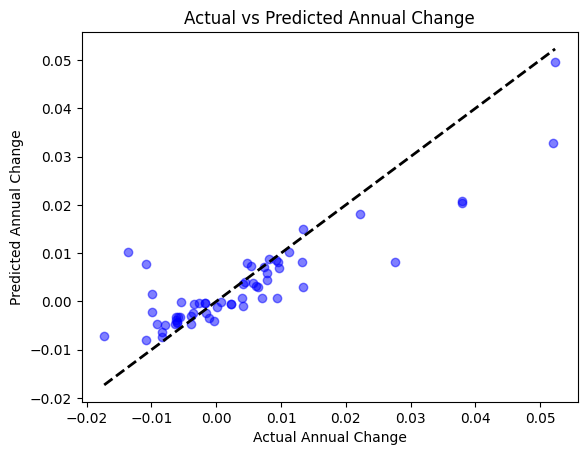

In [9]:
# Plot the results
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Annual Change')
plt.ylabel('Predicted Annual Change')
plt.title('Actual vs Predicted Annual Change')
plt.show()

In [10]:
# Save model 
pickle.dump(model, open("model.pkl", "wb"))

In [11]:
# Load the saved model
loaded_model = pickle.load(open("model.pkl", "rb"))

In [12]:
# Inference
washington_dc_data = np.array([[8097282, 8740292, 26950, 300.46]])
columns = ['Population 2024', 'Population 2020', 'Density (/mile2)', 'Area (mile2)']
washington_dc_data_df = pd.DataFrame(washington_dc_data, columns=columns)
predicted_metrics = loaded_model.predict(washington_dc_data_df)
print(f"Predicted Annual Change: {predicted_metrics}")

Predicted Annual Change: [-0.0195]
